In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
genes = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/00-Final_files/protein_coding_genes_list.txt", names=["Gene"])
genes

,Gene
0,ENSG00000186092.7
1,ENSG00000284733.2
2,ENSG00000284662.2
3,ENSG00000187634.13
4,ENSG00000188976.11
...,...
20065,ENSG00000277836.1
20066,ENSG00000278633.1
20067,ENSG00000276017.1
20068,ENSG00000278817.1


In [3]:
mbqtl = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/00-Final_files/pub_rna_100perm_30_cutoff_maf_0.05/merged_topEffects_final.txt", sep="\t")
mbqtl

,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,...,DatasetCorrelationCoefficients.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,DatasetZScores.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,DatasetSampleSizes.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
0,ENSG00000204792.2,2,74918148,+,ENSG00000204792.2,rs12713826,2,75041011,T/A,A,...,-;-;0.744204;0.554869;0.764917;0.824807;0.8929...,-;-;6.694893;3.064522;6.798465;14.189217;17.11...,-;-;58;28;55;179;186;116;36,1130,0.00,0.802280,59.474285,3.045097e-119,0.000028,1.121408e-114
1,ENSG00000226752.10,9,120824828,+,ENSG00000226752.10,rs12684934,9,120830881,C/T,T,...,-;-0.656852;-0.840908;-0.525352;-0.743613;-;-0...,-;-4.285708;-8.259505;-2.87077;-6.503607;-;-16...,-;35;58;28;55;-;186;116;36,1016,0.00,1.102720,48.148537,2.816799e-113,0.000218,5.186666e-109
2,ENSG00000258289.10,14,64914361,+,ENSG00000258289.10,rs11158569,14,64933351,C/T,T,...,-;-;0.82668;-;0.653926;0.782285;0.804819;0.831...,-;-;7.993022;-;5.413564;12.927695;13.838477;11...,-;-;58;-;55;179;186;116;36,1679,0.00,0.835944,111.704155,6.165525e-110,0.000019,7.568524e-106
3,ENSG00000121716.21,7,100352176,+,ENSG00000121716.21,rs7792525,7,100374499,A/G,G,...,-;0.790385;0.779892;-;0.718911;0.751346;0.7451...,-;5.647567;7.214328;-;6.181571;12.114261;12.19...,-;35;58;-;55;179;186;116;36,2772,0.00,0.886368,239.438955,8.084247e-105,0.000013,7.442897e-101
4,ENSG00000196862.10,2,107826892,+,ENSG00000196862.10,rs11123707,2,108566901,G/A,A,...,-;0.557069;0.675051;0.645076;0.746054;0.743858...,-;3.475933;5.811565;3.706117;6.536538;11.92781...,-;35;58;28;55;179;186;116;36,967,0.00,0.921330,19.881561,1.528286e-103,0.000198,1.125633e-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,ENSG00000228262.11,2,33706886,+,ENSG00000228262.11,rs1470611,2,33671049,C/A,A,...,-;-;-;-;-0.377367;-;-;-;-0.507666,-;-;-;-;-2.840179;-;-;-;-3.160536,-;-;-;-;55;-;-;-;36,755,0.00,0.750680,38.121667,6.234829e-03,0.000027,4.982812e-02
4608,ENSG00000110881.12,12,50057548,+,ENSG00000110881.12,rs386376466,12,50128488,C/CAAA,CAAA,...,-0.21666;-0.287802;-0.151555;-0.02799;0.086965...,-1.191061;-1.676505;-1.135654;-0.141382;0.6313...,32;35;58;28;55;179;186;116;36,2512,0.00,0.822640,104.917207,6.248249e-03,0.000019,4.990659e-02
4609,ENSG00000117153.16,1,202891116,-,ENSG00000117153.16,rs7539542,1,202940846,G/C,C,...,-;-;0.30794;0.584245;-0.046837;-;0.240089;-;0....,-;-;2.351604;3.26448;-0.339558;-;3.30072;-;0.5...,-;-;58;28;55;-;186;-;36,1976,0.01,0.919379,181.941473,6.248713e-03,0.000021,4.990659e-02
4610,ENSG00000257431.1,12,82512677,+,ENSG00000257431.1,rs11358515,12,82432863,TA/T,T,...,-;-;-;-;-;-;-0.236501;-;-0.238909,-;-;-;-;-;-;-3.249935;-;-1.403279,-;-;-;-;-;-;186;-;36,201,0.00,0.870215,6.988307,6.246344e-03,0.000401,4.990659e-02


In [4]:
intersect = set(mbqtl["Gene"]) & set(genes["Gene"])
print(len(intersect))

2820


In [5]:
filtered_mbqtl = mbqtl[mbqtl["Gene"].isin(genes["Gene"])]
filtered_mbqtl

,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,SNPEffectAllele,...,DatasetCorrelationCoefficients.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,DatasetZScores.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,DatasetSampleSizes.ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239.,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
2,ENSG00000258289.10,14,64914361,+,ENSG00000258289.10,rs11158569,14,64933351,C/T,T,...,-;-;0.82668;-;0.653926;0.782285;0.804819;0.831...,-;-;7.993022;-;5.413564;12.927695;13.838477;11...,-;-;58;-;55;179;186;116;36,1679,0.00,0.835944,111.704155,6.165525e-110,0.000019,7.568524e-106
3,ENSG00000121716.21,7,100352176,+,ENSG00000121716.21,rs7792525,7,100374499,A/G,G,...,-;0.790385;0.779892;-;0.718911;0.751346;0.7451...,-;5.647567;7.214328;-;6.181571;12.114261;12.19...,-;35;58;-;55;179;186;116;36,2772,0.00,0.886368,239.438955,8.084247e-105,0.000013,7.442897e-101
4,ENSG00000196862.10,2,107826892,+,ENSG00000196862.10,rs11123707,2,108566901,G/A,A,...,-;0.557069;0.675051;0.645076;0.746054;0.743858...,-;3.475933;5.811565;3.706117;6.536538;11.92781...,-;35;58;28;55;179;186;116;36,967,0.00,0.921330,19.881561,1.528286e-103,0.000198,1.125633e-99
5,ENSG00000164308.17,5,96875986,+,ENSG00000164308.17,rs35304156,5,96983311,CAT/C,C,...,-;0.51394;0.749766;-;0.822442;0.725984;0.87741...,-;3.158018;6.772461;-;7.699995;11.497036;16.42...,-;35;58;-;55;179;186;116;36,1673,0.00,0.781309,76.946810,7.958886e-96,0.000018,4.884987e-92
6,ENSG00000165171.11,7,73834590,-,ENSG00000165171.11,rs11284359,7,73832811,TA/T,T,...,-0.467706;-0.595068;-0.619319;-0.751967;-0.732...,-2.699243;-3.77041;-5.182763;-4.613664;-6.3519...,32;35;58;28;55;179;186;116;36,1057,0.00,0.833217,86.466338,1.020071e-95,0.000024,5.366544e-92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,ENSG00000138092.11,2,24793136,+,ENSG00000138092.11,rs1369703,2,25259029,T/C,C,...,-;-;-;-;-0.159179;-;-0.299426;-;-0.054683,-;-;-;-;-1.160808;-;-4.151757;-;-0.316754,-;-;-;-;55;-;186;-;36,2223,0.01,0.929818,74.615093,6.185948e-03,0.000056,4.948042e-02
4604,ENSG00000154917.11,3,133824235,-,ENSG00000154917.11,rs10512913,3,133820730,A/C,C,...,-;-;-0.10085;-;-0.424805;-;-0.192914;-;-0.19788,-;-;-0.753253;-;-3.232675;-;-2.638084;-;-1.156861,-;-;58;-;55;-;186;-;36,629,0.00,0.881692,41.245418,6.200686e-03,0.000073,4.958753e-02
4606,ENSG00000114654.8,3,129001304,+,ENSG00000114654.8,rs2341295,3,129032259,G/C,C,...,-;-;-;-;0.367975;-;0.252353;-;0.033029,-;-;-;-;2.763998;-;3.474853;-;0.191234,-;-;-;-;55;-;186;-;36,1934,0.01,0.903451,103.664100,6.224220e-03,0.000034,4.975413e-02
4608,ENSG00000110881.12,12,50057548,+,ENSG00000110881.12,rs386376466,12,50128488,C/CAAA,CAAA,...,-0.21666;-0.287802;-0.151555;-0.02799;0.086965...,-1.191061;-1.676505;-1.135654;-0.141382;0.6313...,32;35;58;28;55;179;186;116;36,2512,0.00,0.822640,104.917207,6.248249e-03,0.000019,4.990659e-02


In [6]:
# ERP113396.ERP114636.SRP063496.SRP068609.SRP077046.SRP096757.SRP129004.SRP155976.SRP189239
filtered_mbqtl.columns = ['Gene', 'GeneChr', 'GenePos', 'GeneStrand', 'GeneSymbol', 'SNP',
       'SNPChr', 'SNPPos', 'SNPAlleles', 'SNPEffectAllele',
       'SNPEffectAlleleFreq', 'QTLType', 'MetaP', 'MetaPN', 'MetaPZ',
       'MetaBeta', 'MetaSE', 'MetaI2', 'NrDatasets',
       'DatasetCorrelationCoefficients',
       'DatasetZScores',
       'DatasetSampleSizes',
       'NrTestedSNPs', 'ProportionBetterPermPvals', 'BetaDistAlpha',
       'BetaDistBeta', 'BetaAdjustedMetaP', 'PvalueNominalThreshold', 'qval']
filtered_mbqtl = filtered_mbqtl.reset_index()
filtered_mbqtl.head(5)

,index,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,...,DatasetCorrelationCoefficients,DatasetZScores,DatasetSampleSizes,NrTestedSNPs,ProportionBetterPermPvals,BetaDistAlpha,BetaDistBeta,BetaAdjustedMetaP,PvalueNominalThreshold,qval
0,2,ENSG00000258289.10,14,64914361,+,ENSG00000258289.10,rs11158569,14,64933351,C/T,...,-;-;0.82668;-;0.653926;0.782285;0.804819;0.831...,-;-;7.993022;-;5.413564;12.927695;13.838477;11...,-;-;58;-;55;179;186;116;36,1679,0.0,0.835944,111.704155,6.165525e-110,0.000019,7.568524e-106
1,3,ENSG00000121716.21,7,100352176,+,ENSG00000121716.21,rs7792525,7,100374499,A/G,...,-;0.790385;0.779892;-;0.718911;0.751346;0.7451...,-;5.647567;7.214328;-;6.181571;12.114261;12.19...,-;35;58;-;55;179;186;116;36,2772,0.0,0.886368,239.438955,8.084247e-105,0.000013,7.442897e-101
2,4,ENSG00000196862.10,2,107826892,+,ENSG00000196862.10,rs11123707,2,108566901,G/A,...,-;0.557069;0.675051;0.645076;0.746054;0.743858...,-;3.475933;5.811565;3.706117;6.536538;11.92781...,-;35;58;28;55;179;186;116;36,967,0.0,0.921330,19.881561,1.528286e-103,0.000198,1.125633e-99
3,5,ENSG00000164308.17,5,96875986,+,ENSG00000164308.17,rs35304156,5,96983311,CAT/C,...,-;0.51394;0.749766;-;0.822442;0.725984;0.87741...,-;3.158018;6.772461;-;7.699995;11.497036;16.42...,-;35;58;-;55;179;186;116;36,1673,0.0,0.781309,76.946810,7.958886e-96,0.000018,4.884987e-92
4,6,ENSG00000165171.11,7,73834590,-,ENSG00000165171.11,rs11284359,7,73832811,TA/T,...,-0.467706;-0.595068;-0.619319;-0.751967;-0.732...,-2.699243;-3.77041;-5.182763;-4.613664;-6.3519...,32;35;58;28;55;179;186;116;36,1057,0.0,0.833217,86.466338,1.020071e-95,0.000024,5.366544e-92


In [7]:
filtered_mbqtl[['MetaPZ','DatasetZScores']]

,MetaPZ,DatasetZScores
0,24.583483,-;-;7.993022;-;5.413564;12.927695;13.838477;11...
1,23.347720,-;5.647567;7.214328;-;6.181571;12.114261;12.19...
2,22.655268,-;3.475933;5.811565;3.706117;6.536538;11.92781...
3,23.719645,-;3.158018;6.772461;-;7.699995;11.497036;16.42...
4,-22.964243,-2.699243;-3.77041;-5.182763;-4.613664;-6.3519...
...,...,...
2815,-4.033554,-;-;-;-;-1.160808;-;-4.151757;-;-0.316754
2816,-3.968234,-;-;-0.753253;-;-3.232675;-;-2.638084;-;-1.156861
2817,4.147997,-;-;-;-;2.763998;-;3.474853;-;0.191234
2818,-4.282618,-1.191061;-1.676505;-1.135654;-0.141382;0.6313...


In [14]:
df.head()

,MetaPZ,0,1,2,3,4,5,6,7,8
0,24.583483,NaN,NaN,7.993022,NaN,5.413564,12.927695,13.838477,11.546146,4.995196
1,23.347720,NaN,5.647567,7.214328,NaN,6.181571,12.114261,12.193646,10.695208,4.052628
2,22.655268,NaN,3.475933,5.811565,3.706117,6.536538,11.927816,13.093258,10.251366,2.487457
3,23.719645,NaN,3.158018,6.772461,NaN,7.699995,11.497036,16.421251,6.573876,5.954764
4,-22.964243,-2.699243,-3.770410,-5.182763,-4.613664,-6.351923,-11.748592,-13.970866,-9.777372,-2.789439


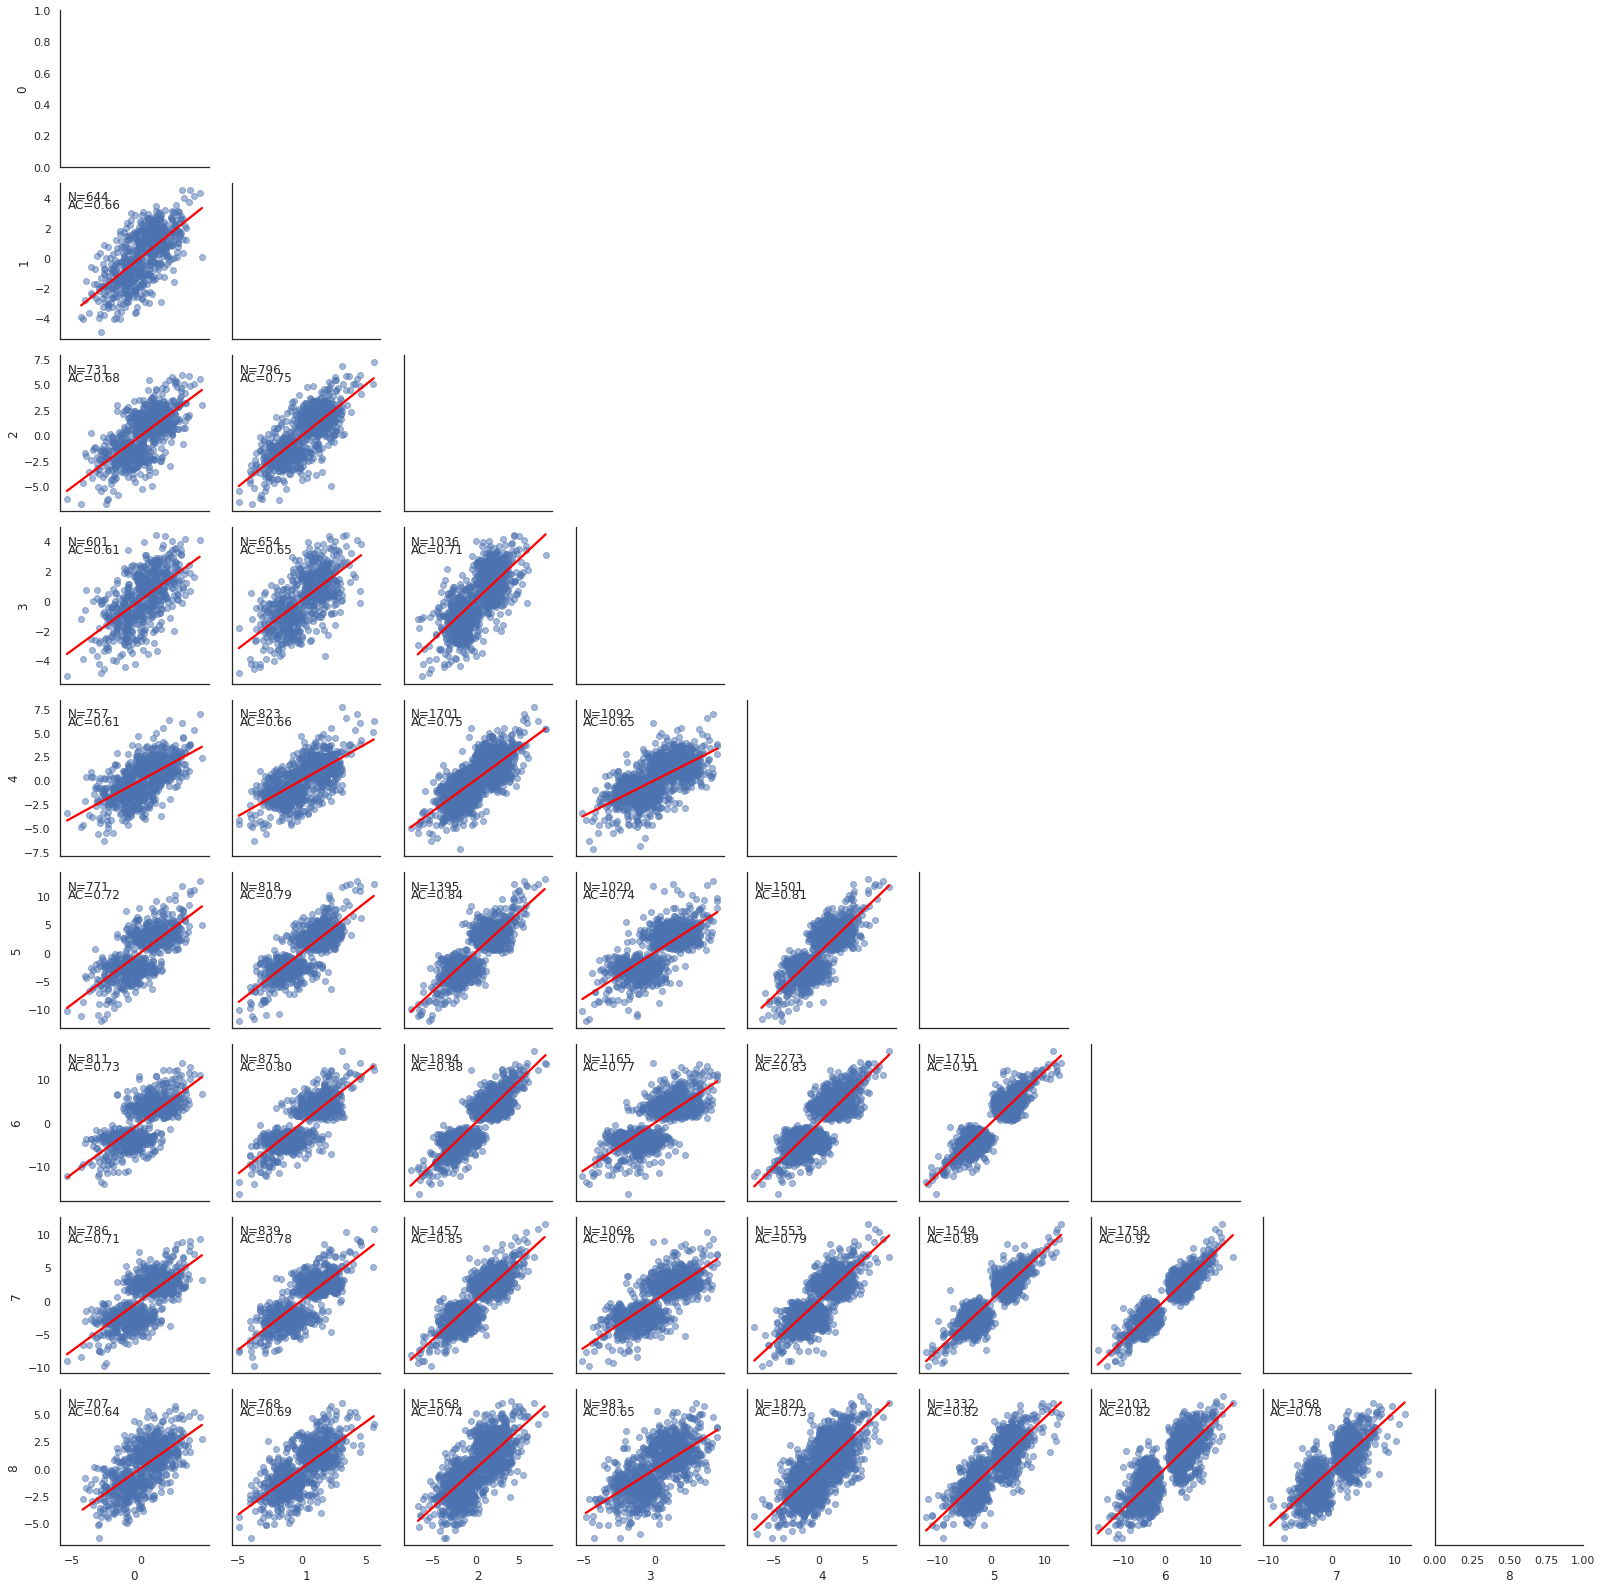

In [15]:
# Replace '-' with NaN and convert columns to numeric
dataset_columns = dataset_columns.replace('-', np.nan).apply(pd.to_numeric)

# Create a PairGrid for the staircase plot
g = sns.PairGrid(dataset_columns)

x_labels = ['ERP113396', 'ERP114636', 'SRP063496', 'SRP068609', 'SRP077046',
            'SRP096757', 'SRP129004', 'SRP155976', 'SRP189239']

y_labels = ['ERP113396 n=32', 'ERP114636 n=35', 'SRP063496 n=58', 'SRP068609 n=28', 'SRP077046 n=55',
            'SRP096757 n=179', 'SRP129004 n=186', 'SRP155976 n=116', 'SRP189239 n=36']

# Function to plot scatter with trendline, N, and AC (correlation coefficient)
def scatter_with_trendline(x, y, **kwargs):
    # Scatter plot with trendline
    sns.regplot(x=x, y=y, ci=None, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, **kwargs)

    # Calculate number of data points (N)
    n = np.sum(~np.isnan(x) & ~np.isnan(y))

    # Calculate the Pearson correlation coefficient (AC)
    if n > 1:
        ac = np.corrcoef(x[~np.isnan(x) & ~np.isnan(y)], y[~np.isnan(x) & ~np.isnan(y)])[0, 1]
        ac_text = f'AC={ac:.2f}'
    else:
        ac_text = 'AC=NaN'

    # Display N and AC on the plot
    plt.text(0.05, 0.95, f'N={n}', ha='left', va='top', transform=plt.gca().transAxes)
    plt.text(0.05, 0.90, ac_text, ha='left', va='top', transform=plt.gca().transAxes)

# Map the lower triangle with scatter plots including trendlines, leave the diagonal and upper triangle empty
g.map_lower(scatter_with_trendline)

# Remove upper triangle and diagonal plots by setting their axes to invisible
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

# Adjust the layout and show the plot
plt.show()

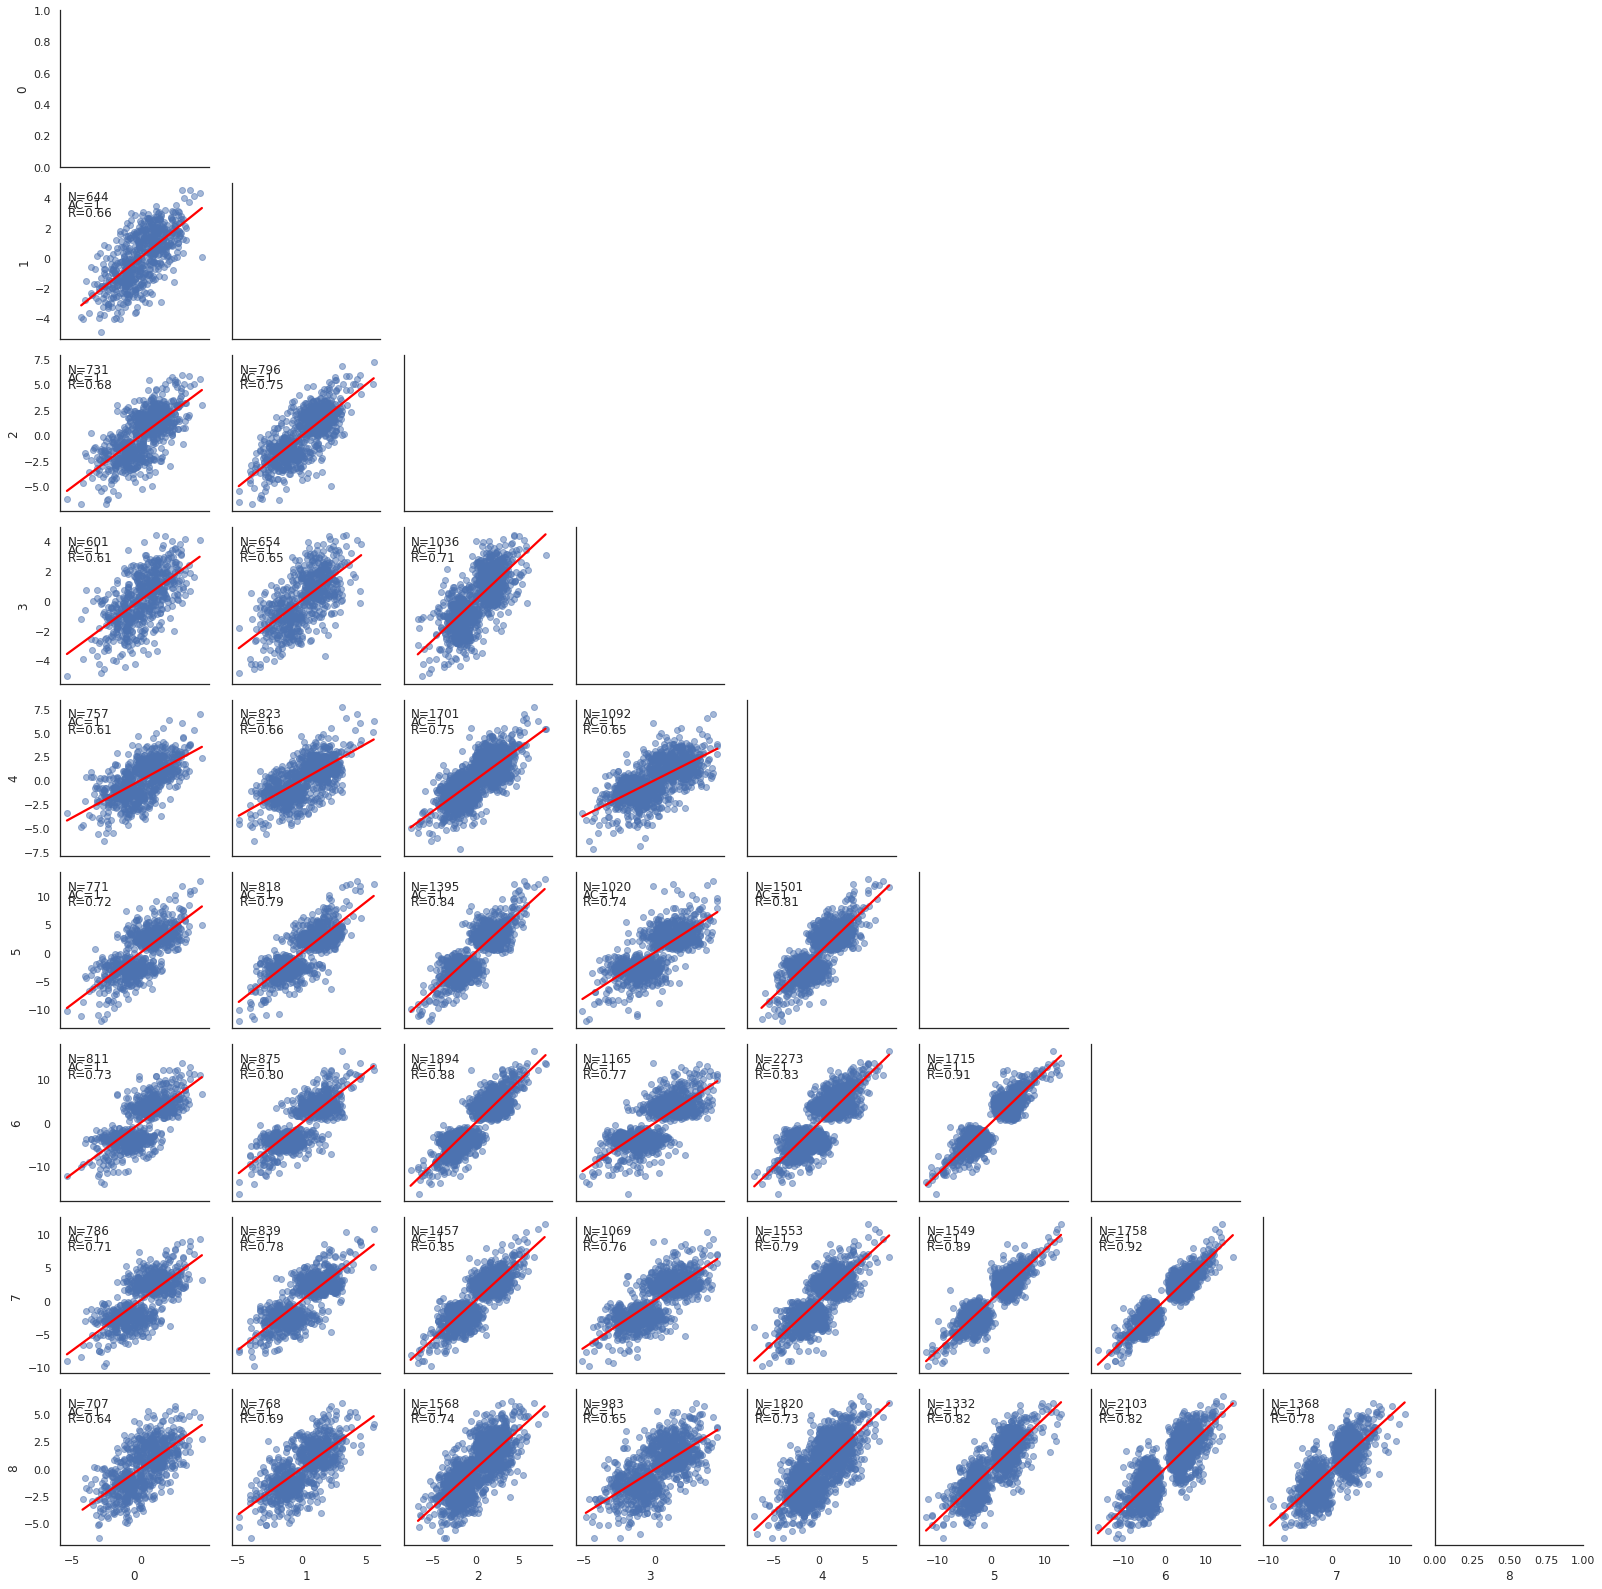

In [13]:
# Replace '-' with NaN and convert columns to numeric
dataset_columns = dataset_columns.replace('-', np.nan).apply(pd.to_numeric)

# Create a PairGrid for the staircase plot
g = sns.PairGrid(dataset_columns)

x_labels = ['ERP113396', 'ERP114636', 'SRP063496', 'SRP068609', 'SRP077046',
            'SRP096757', 'SRP129004', 'SRP155976', 'SRP189239']

y_labels = ['ERP113396 n=32', 'ERP114636 n=35', 'SRP063496 n=58', 'SRP068609 n=28', 'SRP077046 n=55',
            'SRP096757 n=179', 'SRP129004 n=186', 'SRP155976 n=116', 'SRP189239 n=36']

# Function to plot scatter with trendline, N, AC (correlation direction), and R (Pearson correlation coefficient)
def scatter_with_trendline(x, y, **kwargs):
    # Scatter plot with trendline
    sns.regplot(x=x, y=y, ci=None, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, **kwargs)

    # Calculate number of data points (N)
    n = np.sum(~np.isnan(x) & ~np.isnan(y))

    # Calculate the Pearson correlation coefficient (R)
    if n > 1:
        r = np.corrcoef(x[~np.isnan(x) & ~np.isnan(y)], y[~np.isnan(x) & ~np.isnan(y)])[0, 1]
        ac_text = f'AC={np.sign(r):.0f}'  # AC will be -1 or 1 depending on the sign of R
        r_text = f'R={r:.2f}'             # R will be the Pearson correlation coefficient
    else:
        ac_text = 'AC=NaN'
        r_text = 'R=NaN'

    # Display N, AC, and R on the plot
    plt.text(0.05, 0.95, f'N={n}', ha='left', va='top', transform=plt.gca().transAxes)
    plt.text(0.05, 0.90, ac_text, ha='left', va='top', transform=plt.gca().transAxes)
    plt.text(0.05, 0.85, r_text, ha='left', va='top', transform=plt.gca().transAxes)

# Map the lower triangle with scatter plots including trendlines, leave the diagonal and upper triangle empty
g.map_lower(scatter_with_trendline)

# Remove upper triangle and diagonal plots by setting their axes to invisible
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

# Adjust the layout and show the plot
plt.show()

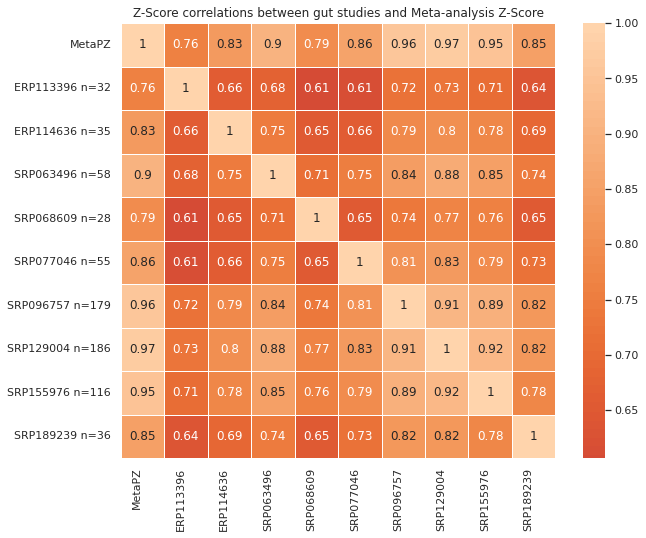

In [11]:
# Define different labels for x and y axes
x_labels = ['MetaPZ','ERP113396', 'ERP114636', 'SRP063496', 'SRP068609', 'SRP077046',
            'SRP096757', 'SRP129004', 'SRP155976', 'SRP189239']
y_labels = ['MetaPZ','ERP113396 n=32', 'ERP114636 n=35', 'SRP063496 n=58', 'SRP068609 n=28', 'SRP077046 n=55',
            'SRP096757 n=179', 'SRP129004 n=186', 'SRP155976 n=116', 'SRP189239 n=36']

# Split the 'DatasetZScores' column into 9 separate columns
dataset_columns = filtered_mbqtl['DatasetZScores'].str.split(';', expand=True)

# Convert dataset columns to numeric values, replace '-' with NaN
dataset_columns = dataset_columns.replace('-', np.nan).apply(pd.to_numeric)

# Concatenate MetaPZ and dataset columns
df = pd.concat([filtered_mbqtl[['MetaPZ']], dataset_columns], axis=1)

# Calculate correlation of MetaPZ with each dataset
correlations = df.corr()['MetaPZ'][0:]

# Pairwise correlation matrix (excluding MetaPZ)
pairwise_corr = df.iloc[:, 0:].corr()

# Plotting the pairwise correlation matrix
sns.set(style="white")
mask = np.triu(np.ones_like(pairwise_corr, dtype=bool))  # Mask to avoid duplicate plots
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pairwise_corr, annot=True, cmap='icefire', center=0, square=True, linewidths=0.5)
plt.title("Z-Score correlations between gut studies and Meta-analysis Z-Score")

# Set x-axis and y-axis labels
heatmap.set_xticklabels(x_labels, rotation=90, ha='right')
heatmap.set_yticklabels(y_labels, rotation=0)

plt.show()

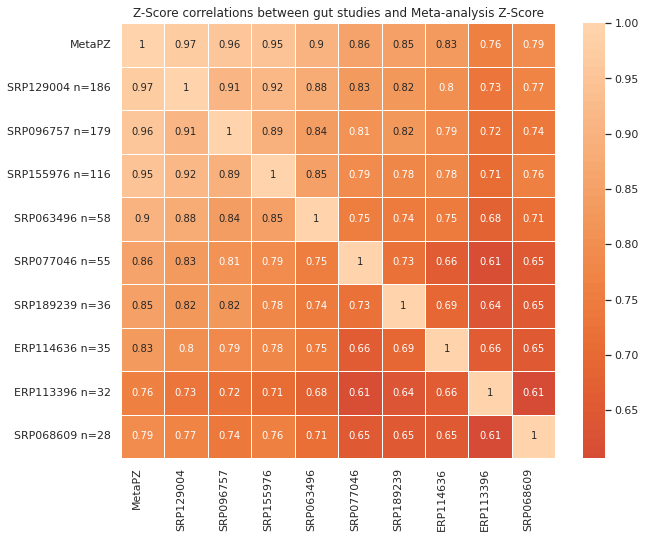

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to extract dataset size and handle "MetaPZ"
def get_dataset_size(label):
    if label == 'MetaPZ':
        return float('inf')  # Assign a very large value to prioritize it last
    else:
        return int(label.split('n=')[-1])

# Define different labels for x and y axes
x_labels = ['MetaPZ', 'ERP113396', 'ERP114636', 'SRP063496', 'SRP068609', 'SRP077046',
            'SRP096757', 'SRP129004', 'SRP155976', 'SRP189239']
y_labels = ['MetaPZ', 'ERP113396 n=32', 'ERP114636 n=35', 'SRP063496 n=58', 'SRP068609 n=28', 'SRP077046 n=55',
            'SRP096757 n=179', 'SRP129004 n=186', 'SRP155976 n=116', 'SRP189239 n=36']

# Extract dataset sizes from y_labels
dataset_sizes = [get_dataset_size(label) for label in y_labels]

# Sort x and y labels and sizes together based on dataset size (descending order)
sorted_indices = np.argsort(dataset_sizes)[::-1]  # Descending order
sorted_x_labels = [x_labels[i] for i in sorted_indices]
sorted_y_labels = [y_labels[i] for i in sorted_indices]

# Split the 'DatasetZScores' column into separate columns
dataset_columns = filtered_mbqtl['DatasetZScores'].str.split(';', expand=True)

# Convert dataset columns to numeric values, replace '-' with NaN
dataset_columns = dataset_columns.replace('-', np.nan).apply(pd.to_numeric)

# Concatenate MetaPZ and dataset columns
df = pd.concat([filtered_mbqtl[['MetaPZ']], dataset_columns], axis=1)

# Sort the dataframe columns based on sorted indices
df_sorted = df.iloc[:, sorted_indices]

# Calculate the pairwise correlation matrix
pairwise_corr = df_sorted.corr()

# Plotting the pairwise correlation matrix
sns.set(style="white")
mask = np.triu(np.ones_like(pairwise_corr, dtype=bool))  # Mask to avoid duplicate plots
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pairwise_corr, annot=True, cmap='icefire', center=0, square=True, linewidths=0.5)
plt.title("Z-Score correlations between gut studies and Meta-analysis Z-Score")

# Set x-axis and y-axis labels
heatmap.set_xticklabels(sorted_x_labels, rotation=90, ha='right')
heatmap.set_yticklabels(sorted_y_labels, rotation=0)

plt.show()
